Dariel Seydulov 62642 bachelor
Kosta Dimitrov 62638 bachelor

Project type A


Project Name: Black Friday Price Predictions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
#read the train data
df=pd.read_csv("./data/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


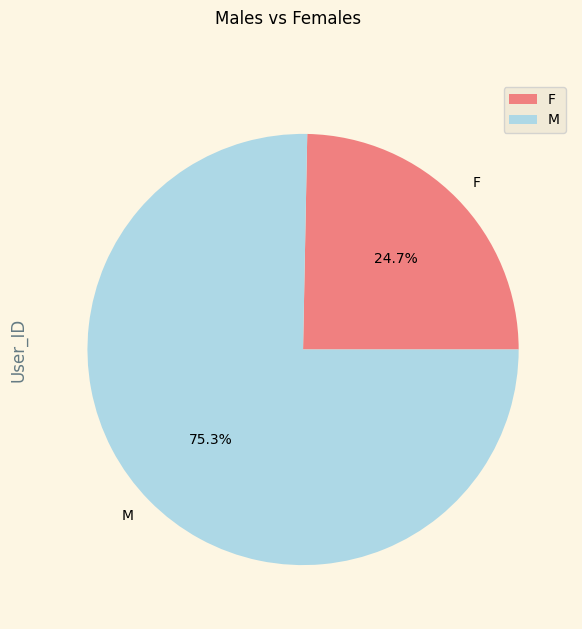

In [8]:
gender_count = df[['Gender', 'User_ID']].groupby('Gender').count()

custom_colors = ['lightcoral', 'lightblue']

plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie', autopct='%1.1f%%', subplots=True, title='Males vs Females', figsize=(12, 7),
                  colors=custom_colors)

plt.show()

Text(0.5, 1.0, 'Gender per transaction')

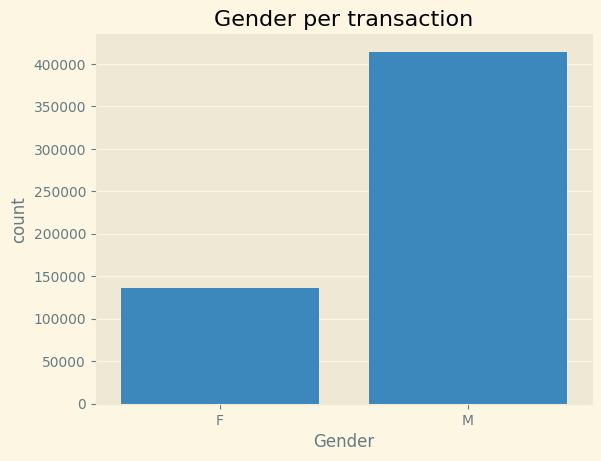

In [9]:
sns.countplot(x=df.Gender)
plt.title('Gender per transaction')

array([<Axes: ylabel='User_ID'>], dtype=object)

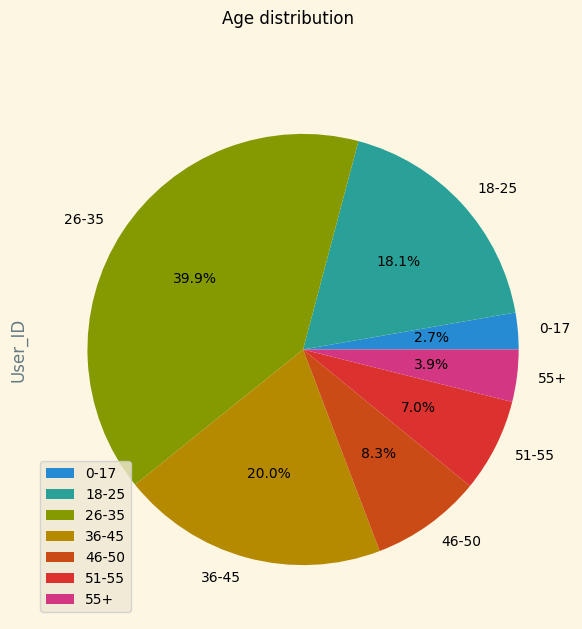

In [10]:
gender_count=df[['Age','User_ID']].groupby('Age').count()
gender_count
plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie',autopct='%1.1f%%',subplots=True,title='Age distribution',figsize=(12,7))

In [11]:
#Drop unnecessary column
df.drop(['User_ID'],axis=1,inplace=True)

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


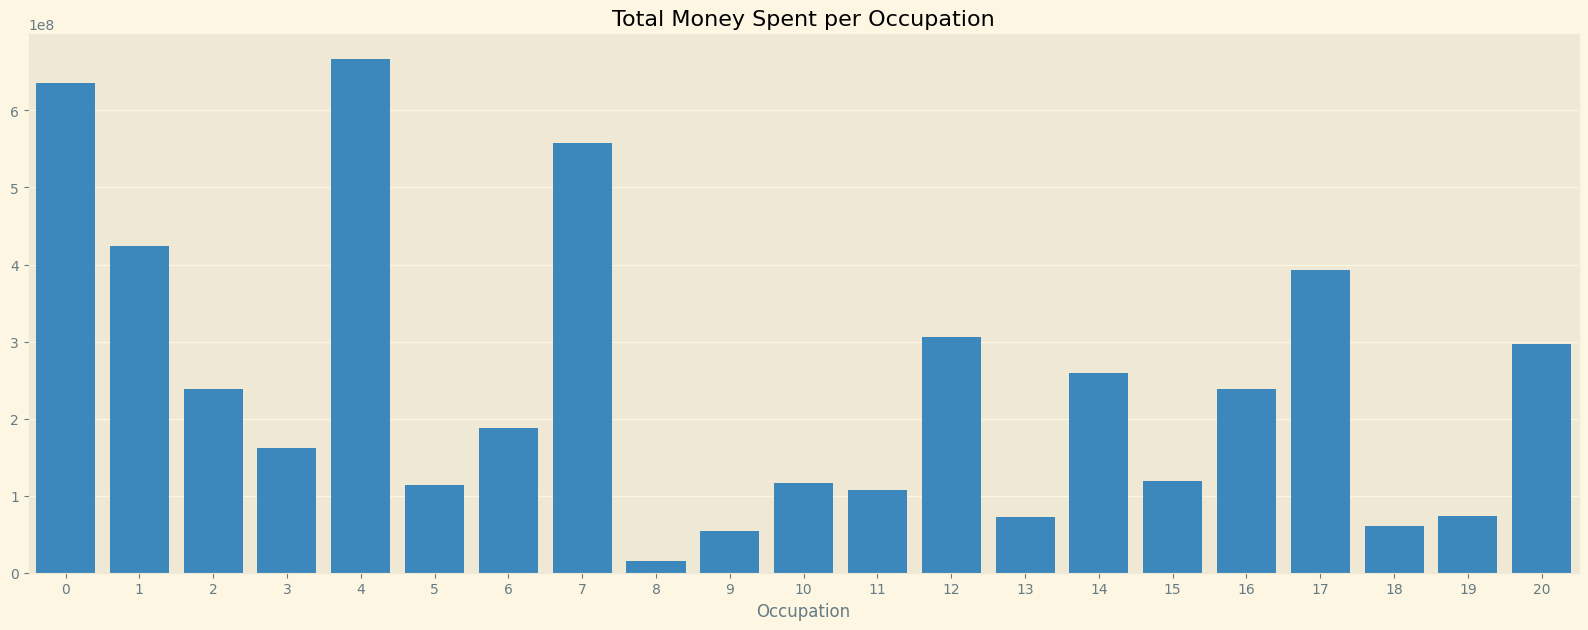

In [14]:
spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

In [15]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:

label_encoder = preprocessing.LabelEncoder()

df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [17]:

df = pd.concat([df, pd.get_dummies(df['City_Category'], prefix='City')], axis=1)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,True,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,True,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,False,False,True


In [18]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,False,False,True


In [19]:
#Check for missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
City_A                             0
City_B                             0
City_C                             0
dtype: int64

In [20]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [22]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [23]:
category_2_mode=df['Product_Category_2'].mode()[0]
df['Product_Category_2']=df['Product_Category_2'].fillna(category_2_mode)

df['Product_Category_2'].isnull().sum()

0

In [24]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [26]:
category_3_mode=df['Product_Category_3'].mode()[0]
df['Product_Category_3']=df['Product_Category_3'].fillna(category_3_mode)

df['Product_Category_3'].isnull().sum()

0

In [27]:
df['Purchase'].isnull().sum()

0

In [28]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City_A                        0
City_B                        0
City_C                        0
dtype: int64

In [29]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  bool   
 11  City_B                      550068 non-null  bool   
 12  City_C                      550068 non-null  bool   
dtypes: bool(3), fl

In [32]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  bool   
 11  City_B                      550068 non-null  bool   
 12  City_C                      550068 non-null  bool   
dtypes: bool(3), fl

<Axes: xlabel='Age', ylabel='Purchase'>

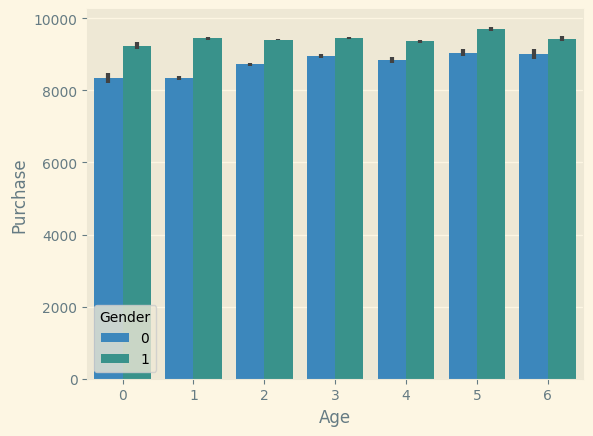

In [33]:

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

Purchase by Age Group

<Axes: title={'center': 'Purchase by Age Group'}, ylabel='Age'>

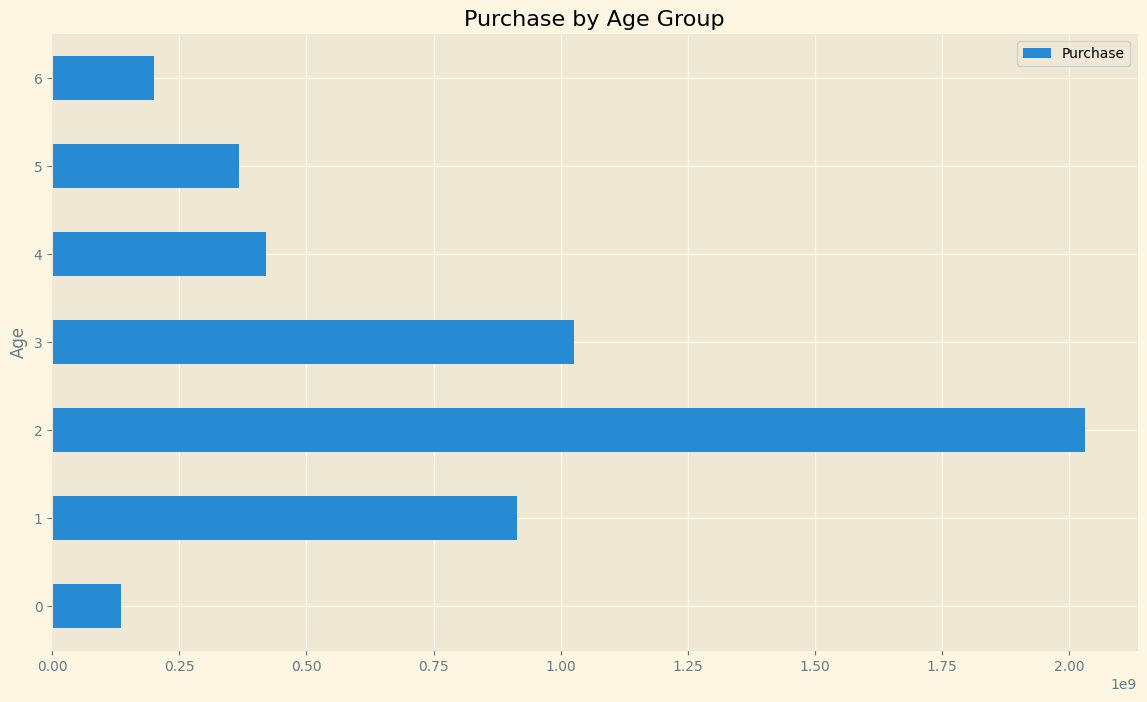

In [34]:
age_pu=df[['Age','Purchase']].groupby('Age').sum()
age_pu.plot(kind='barh',title='Purchase by Age Group', figsize=(14, 8))

Product category by Purchase


<Axes: title={'center': 'Product Category 1 by purchases'}, ylabel='Product_Category_1'>

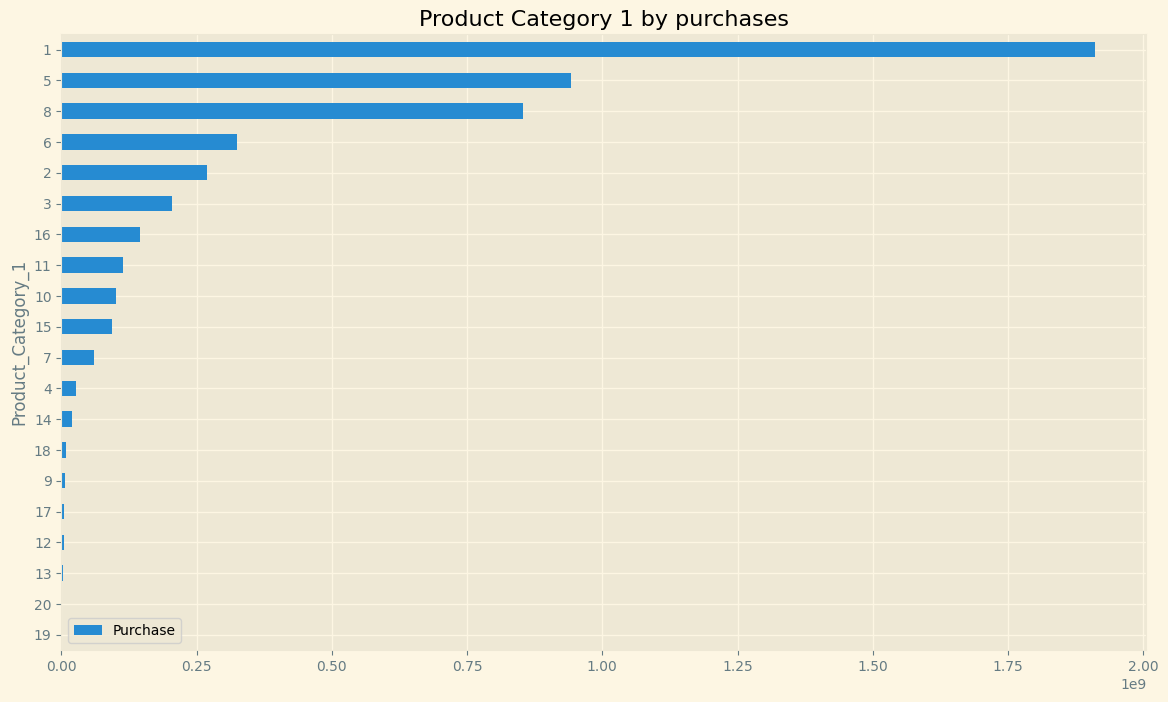

In [35]:
prod_plot1=df[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
prod_plot1=prod_plot1.sort_values(by='Purchase')
prod_plot1.plot(kind='barh',title='Product Category 1 by purchases', figsize=(14, 8))

<Axes: title={'center': 'Product Category 2 by purchases'}, ylabel='Product_Category_2'>

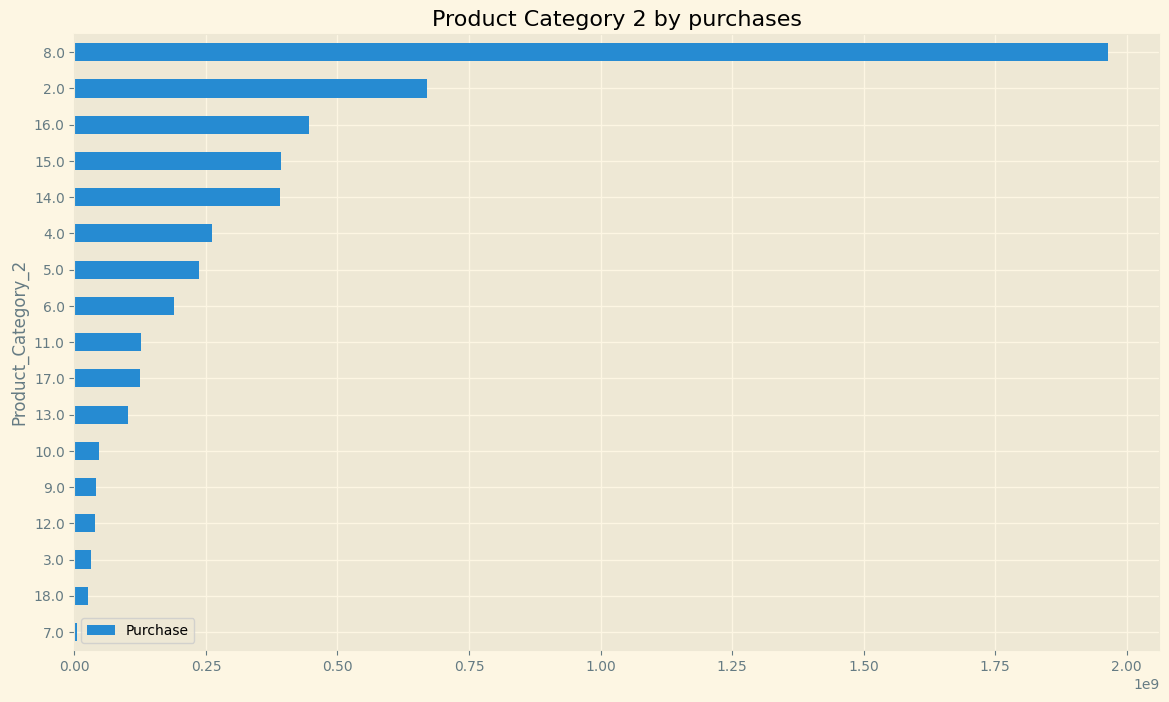

In [36]:
prod_plot2=df[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
prod_plot2=prod_plot2.sort_values(by='Purchase')
prod_plot2.plot(kind='barh',title='Product Category 2 by purchases', figsize=(14, 8))

<Axes: title={'center': 'Product Category 3 by purchases'}, ylabel='Product_Category_3'>

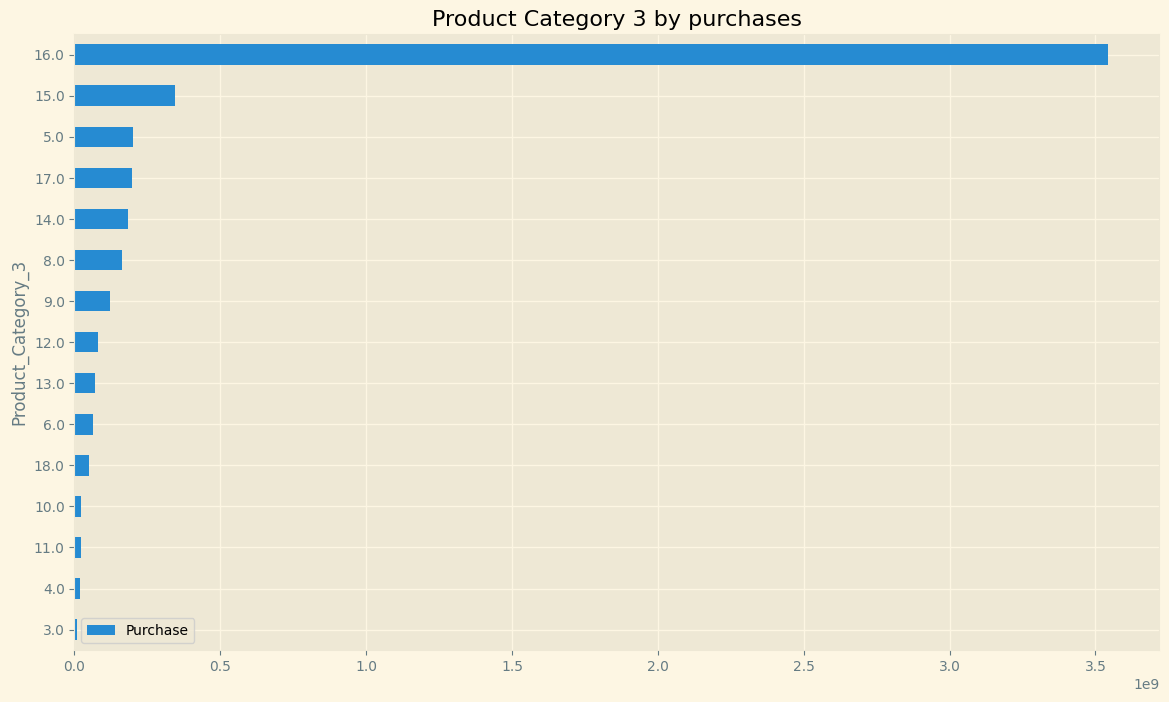

In [37]:
prod_plot3=df[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
prod_plot3=prod_plot3.sort_values(by='Purchase')
prod_plot3.plot(kind='barh',title='Product Category 3 by purchases', figsize=(14, 8))

In [38]:
df.drop('Product_ID',axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,0,0,10,2,0,3,8.0,16.0,8370,True,False,False
1,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,0,0,10,2,0,12,8.0,16.0,1422,True,False,False
3,0,0,10,2,0,12,14.0,16.0,1057,True,False,False
4,1,6,16,4,0,8,8.0,16.0,7969,False,False,True


Our target column will be purchase. We will use linear regression and will test with different types of regularisations, SVM and Neural Network. We will visualise the results.

In [39]:
X= df.values[:,0:11]
Y= df.values[:, 11]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

y_train

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
RandomForestRegressor()

score = rfr.score(X_train,y_train)

y_pred5 = rfr.predict(X_test)
rscore=r2_score(y_test, y_pred5)
df['Prediction']=rfr.predict(X)

df.head(10)